# Main Function

Need to do the following in terminal to run:
mkdir tmp
mkdir tmp/ppo
mkdir plots


In [1]:
import gym
import numpy as np
from ipynb.fs.full.CartPolePPO import Agent
from utils import plot_learning_curve

... saving models ...
episode 0 score 19.0 avg score 19.0 time_steps 19 learning_steps 0
episode 1 score 15.0 avg score 17.0 time_steps 34 learning_steps 1
episode 2 score 19.0 avg score 17.7 time_steps 53 learning_steps 2
... saving models ...
episode 3 score 34.0 avg score 21.8 time_steps 87 learning_steps 4
... saving models ...
episode 4 score 22.0 avg score 21.8 time_steps 109 learning_steps 5
episode 5 score 14.0 avg score 20.5 time_steps 123 learning_steps 6
... saving models ...
episode 6 score 36.0 avg score 22.7 time_steps 159 learning_steps 7
... saving models ...
episode 7 score 24.0 avg score 22.9 time_steps 183 learning_steps 9
... saving models ...
episode 8 score 39.0 avg score 24.7 time_steps 222 learning_steps 11
episode 9 score 11.0 avg score 23.3 time_steps 233 learning_steps 11
episode 10 score 13.0 avg score 22.4 time_steps 246 learning_steps 12
episode 11 score 14.0 avg score 21.7 time_steps 260 learning_steps 13
episode 12 score 13.0 avg score 21.0 time_steps 27

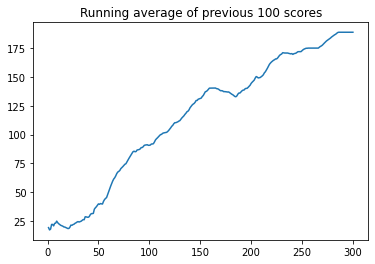

In [3]:
if __name__ == '__main__':
    env = gym.make('CartPole-v0')
    N = 20
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003
    agent = Agent(num_actions=env.action_space.n, batch_size=batch_size, 
                    alpha=alpha, num_epochs=n_epochs, 
                    input_dims=env.observation_space.shape) # does work on more advanced environments but requires more fine-tuning
    n_games = 300

    figure_file = 'plots/cartpole.png'

    best_score = env.reward_range[0]
    score_history = []

    learn_iters = 0
    avg_score = 0
    n_steps = 0

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0: # if true, it's time to perform learning function
                agent.learn()
                learn_iters += 1
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score: # if best score found
            best_score = avg_score
            agent.save_models()

        print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                'time_steps', n_steps, 'learning_steps', learn_iters)
    x = [i+1 for i in range(len(score_history))]
    plot_learning_curve(x, score_history, figure_file)

